<a href="https://colab.research.google.com/github/hongrolee/Python/blob/main/colab/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EC%A4%91%EA%B8%89_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Pandas 개요**

*   Panel Datas의 약자로 패널 자료를 처리한다는 뜻
엑셀의 워크시트를 처리하듯이 패널을 처리하는 기능이 통합된 라이브러리
*   대개 numpy 및 matplotlib과 함께 사용됨
*   선형회귀 및 다중회귀 외의 다양한 모델 기능은 제공하지 않음


# **2. 시리즈(Series)**

*   **인덱스**를 가지고 있는 **1차원 배열 형식**의 데이터 구조
*   딕셔너리와 구조가 유사하여 바로 데이터 변환 가능
*   pd.Series(values)



<시리즈 그림>

In [ ]:
import pandas as pd
sr = pd.Series(['Dog', 'Cat', 'Tiger', 'Lion', 'Monkey'], index = ['0','1','2','3','4'])
sr

0       Dog
1       Cat
2     Tiger
3      Lion
4    Monkey
dtype: object

## 1) 생성

*   Dictionary -> Series
*   List -> Series
*   Tuple -> Series
*   sr = pd.Series([값, 값, ..., ], index = [열이름,열이름, ..., 열이름])



## 2) 추가

*   여러 행 추가 : pd.concat([old sr, new sr]), pd.append([old sr, new sr])



# **3. 데이터 프레임(DataFrame)**

*   numpy : 동일한 데이터 형식의 배열을 사용
*   pandas : 엑셀의 워크시트처럼 다양한 데이터 형식을 배열로 사용할 수 있음
*   따라서 배열(Array) 대신 데이터프레임(DataFrame)이라는 용어를 사용<br>


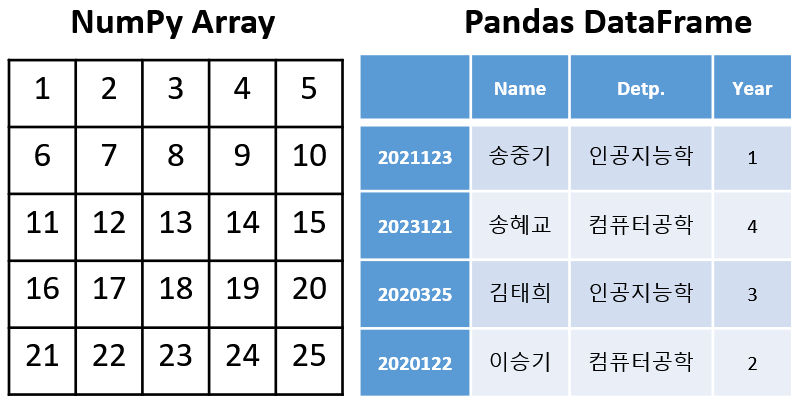


## **1) 핵심 용어 및 접근 방식**
* 시리즈 : 행 또는 열 하나만 추출한 것
* 행 하나에 접근: df.loc[인덱스이름] 또는 df.iloc[행번호]
* 열 하나에 접근: df[열이름] 또는 df.열이름
* 셀 하나에 접근: df.loc[인덱스이름,열이름] 또는 df.iloc[행번호][열번호]
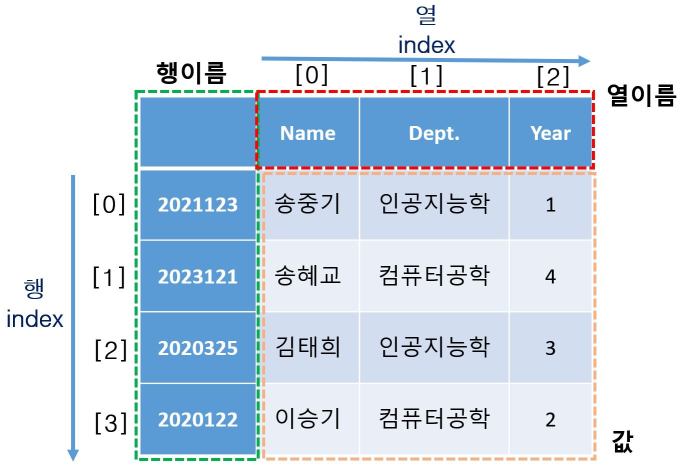

## **2) 라이브러리 설치**

In [ ]:
!pip install pandas

## **3) 데이터 프레임 생성**

### 기본 생성법

*   Dictionary -> DataFrame : 열추가 효과
*   List -> DataFrame : 행 추가 효과



In [ ]:
import pandas as pd
data = {'이름' : ['유정', '유나', '민영', '민지'],
        '나이' : [30, 28, 31, 29],
        '생일' : ['5.2', '4.6', '9.12', '7.19']}
df = pd.DataFrame(data)
print(df)

   이름  나이    생일
0  유정  30   5.2
1  유나  28   4.6
2  민영  31  9.12
3  민지  29  7.19


### 행이름 별도 지정

*   별도의 행이름을 지정 가능
*   pd.DataFrame(data, index=['one','two','three','four'])



In [ ]:
df = pd.DataFrame(data, index=['one','two','three','four'])
print(df)

       이름  나이    생일
one    유정  30   5.2
two    유나  28   4.6
three  민영  31  9.12
four   민지  29  7.19


### 데이터 정보 확인

*   df.info() : 요약 정보 확인
*   df.describe() : 데이터의 세부 분석 정보
*   df.head() : 데이터프레임 앞 일부내용 출력, 개수를 입력 할수도 있음
*   df.tail() : 데이터프레임 뒤 일부내용 출력, 개수를 입력 할수도 있음
*   df.dtypes : 열의 자료형 조회
*   df.index : 행이름 조회
*   df.columns 열이름 조회
*   df.values : 데이터 조회
*   df.count() : 각 열별 행 개수 조회, len(df)와 동일, null 제외
*   type(df.열이름) : 열의 자료형 조회
*   df[열이름].astype(새 열이름) : 열의 이름 변경


## **4) 값 추출**

### 인덱스 및 열이름 추출

*   df.index
*   df.columns



In [ ]:
df = pd.DataFrame(data, index=['one','two','three','four'])
print(df.loc['one'])
print(df.iloc[0])

이름     유정
나이     30
생일    5.2
Name: one, dtype: object
이름     유정
나이     30
생일    5.2
Name: one, dtype: object


### 행과 열의 값 추출(시리즈 추출)

*   행 추출 : df.loc[[행이름,...,행이름]]
*   행 추출 : df.iloc[인덱스,...,인덱스]
*   열 추출 : df[[열이름,...,열이름]] 또는 df.열이름
*   인덱스의 -1 : 마지막행 데이터 의미
*   시리즈 이름 지정 : sr.name = '이름 리스트'



### 하나의 값 추출

*   df.loc[행이름][열이름]
*   df.loc[행이름, 열이름]
*   df.iloc[인덱스][인덱스]
*   df.iloc[인덱스, 인덱스]


### 특정 범위의 값 추출(슬라이싱)

*   df[ 행인덱스 : 행인덱스 ]  ->  df[0:1]
*   df.loc[ 행이름:행이름 ]  ->  df['one':'four']
*   df.loc[ 행이름:행이름,[열이름,...,열이름] ]  ->  df.loc['one':'four',['나이','생일']
*   df.iloc[ 행인덱스:행인덱스 ]  ->  df.iloc[0:2]
*   df.iloc[ 행인덱스:행인덱스, 열인덱스:열인덱스 ]  ->  df.iloc[0:2,0:2]
*   df.iloc[ [ 행인덱스,...,행인덱스 ], [ 열인덱스,...,열인덱스 ] ]  ->  df.iloc[[1,3],[2,5]]
*   df.at[ 행이름, 열이름 ]  ->  df.at['one', '나이']
*   df.iat[ 행인덱스, 열인덱스 ]  ->  df.iat[2,3]

### 조건을 이용한 값 추출

*   df[ df.열이름 >= 값]
*   \>, <, >=, <=, ==, != 모두 사용 가능
*   and(&), or(|), not(~) 모두 사용 가능

### 특정 조건의 선택에 의한 값 추출

*   [df[열이름].isin([값])]
*   df[df[열이름].isin([값])]



## **5) 값 삽입**

### 행 추가

*   기본 : df[인덱스] = ([값, 값, ..., 값])
*   딕셔너리 이용: df[인덱스] = {'이름':'보라', '꽃':'민들레', '키':163, '나이':34}
*   여러 행 추가 : pd.concat([old df, new df]), pd.append([old df, new df], axis)

### 열 추가

*   기본 : df[열이름] = [값, 값, ..., 값]
*   df.insert(인덱스, 열이름, [값, 값, ..., 값])
*   df.insert(인덱스, 시리즈)
*   df.assign(열이름=[값, 값, ..., 값]) : 가장 뒤에 삽입
*   시리즈 이용 : 시리즈 = pd.Series([값, 값, ..., 값], index=['행이름','행이름','행이름'])   df[열이름] = 시리즈   



## **6) 값 삭제**




### 행 삭제

*   기본 : df.drop([인덱스], axis=0)
*   여러 행 삭제: df.drop([인덱스, 인덱스, ..., 인덱스])



### 열 삭제

*   기본 : df.drop([열이름], axis=1)
*   여러 행 삭제: df.drop([열이름, 열이름, ..., 열이름], axis=1)

## **7) 합치기(Merge)**

*   두 데이터프레임 병합
*   merge(df1, df2, how=조인방식, on=키 열이름)
*   조인방식 : inner, outer, left, right



## **8) 파일 읽기**
* csv, excel, json 등 읽기 가능
* read_csv(), read_excel(), read_json()
* 한글 encoding : utf-8, euc-kr, cp949 사용
* example
  - import pandas as pd
<br>filename = '../CSV/singer2.csv'
<br>df = pd.read_csv(filename, index_col=None, encoding='utf-8')
<br>df_sort1 = df.sort_values(by=['평균 키'], axis=0)
<br>print(df_sort1)

## **9) 파일 저장**
* csv, excel, json, pickle 등 저장 가능
* to_csv(), to_excel(), to_json(), to_pickle()